In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Scheme

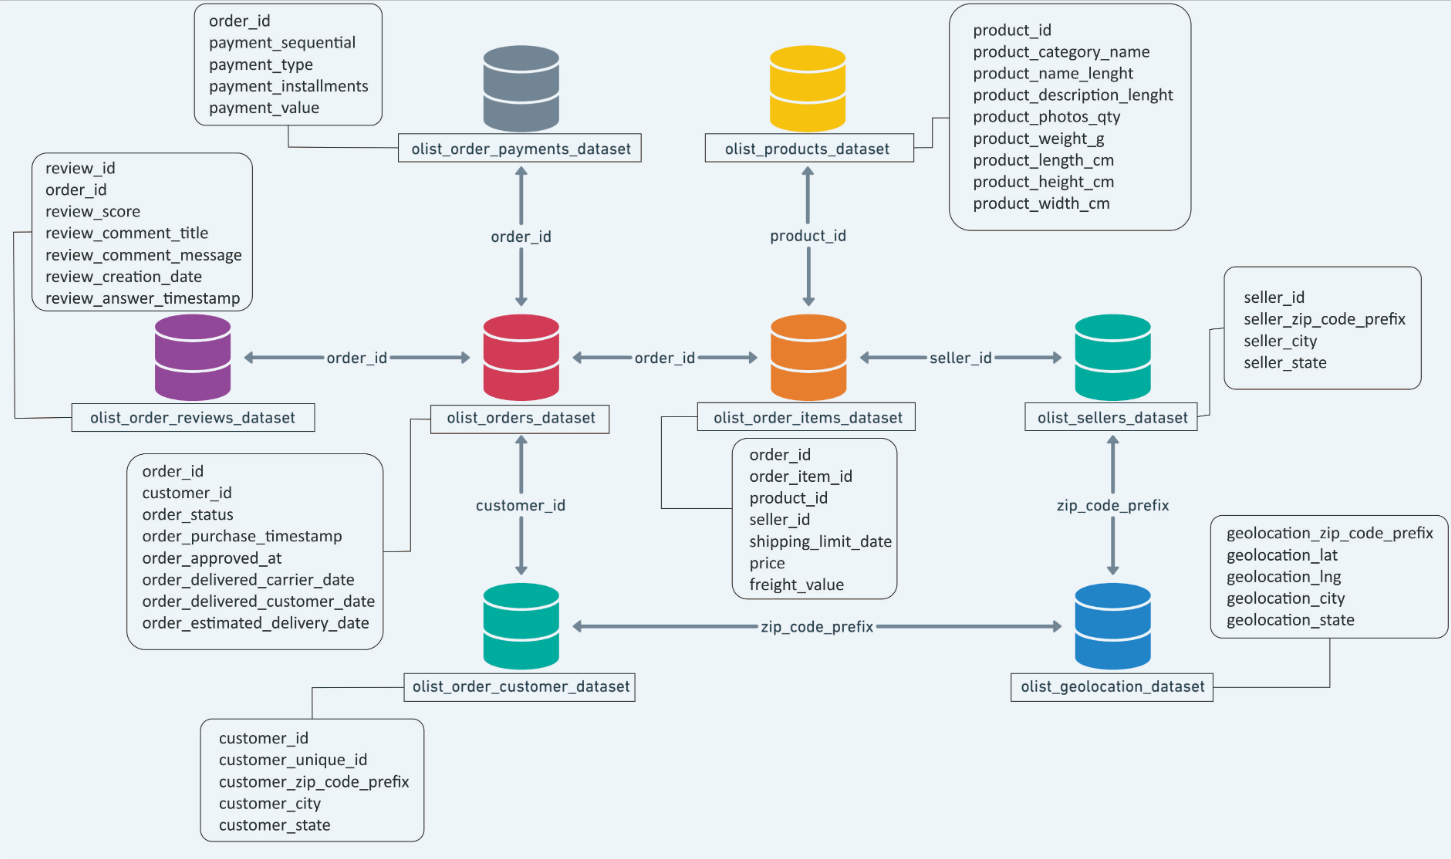

# The Problem

### **Inventory Shortage & Overage**

“`You will never get your inventory buying right`. `The goal is to be less wrong`. The biggest thing to focus on is always to be a bit more conservative with your purchases. **Buying too little and running out will just slow your growth and create a sense of urgency with your customers**. **Buying too much can put you out of business**.”

**—Lanai Moliterno, founder of Sozy**

Ketersediaan inventory yang tidak dapat dipastikan, dapat menyebabkan perusahaan mengambil keputusan yang tidak mendukung naik turunnya permintaan ritel di masa depan.

Kristina Lopienski, direktur pemasaran konten untuk ShipBob, menunjukkan bahwa tidak memesan inventaris yang cukup dari produsen menyebabkan masalah kehabisan stok, pemesanan kembali, dan daftar tunggu. Di sisi lain, ia menyampaikan bahwa pemesanan inventaris yang terlalu banyak mengakibatkan biaya penyimpanan inventaris yang tinggi dan potensi produk yang ketinggalan jaman, kadaluwarsa, atau tidak dapat digunakan.

**Singkatnya:** optimisme yang berlebihan dapat menyebabkan kelebihan pasokan, sementara meremehkan data dapat menyebabkan kehabisan stok. Maka dari itu sangat penting bagi para Merchants untuk memperhatikan stok yang mereka miliki di toko mereka.

### **Price Optimization**

Optimalisasi harga adalah proses menemukan titik harga optimal untuk suatu produk atau layanan. Harga optimal adalah titik harga dimana penjual dapat memperoleh keuntungan maksimal tanpa mengurangi permintaan.

Tanpa Penetapan Harga yang Optimal, **Rendahnya Profitabilitas dan Margin Dalam Bisnis** merupakan fenomena yang umum terjadi. Berikut beberapa alasannya:

1. Strategi Penetapan Harga yang Salah
1. Terlalu Banyak Biaya Overhead
1. Hidden Cost
1. Persaingan ketat

- Kami sebagai tim data Scientist Olist ingin membantu para merchant yang berjualan di Olist meminimalisir terjadinya hal tersebut (**inventory shortage & overage serta Failed price optimization**), sehingga kami akan membuat **model Machine Learning** yang bertujuan untuk `memprediksi Revenue dari para merchant` dengan menggunakan beberapa aspek penjualan seperti `kuantitas barang, harga jual barang, jenis barang, lokasi merchant beroperasi, dll`. 
- Hal ini dilakukan agar para merchant dapat menyesuaikan stok, harga barang dan aspek lainnya yang ingin mereka jual untuk membantu meminimalisir terjadinya **`inventory shortage & overage serta Failed price optimization`** yang berujung kepada optimalnya Revenue yang bisa diperoleh. 

Source:
- https://www.shopify.com/id/retail/inventory-shortages
- https://finance.cornell.edu/accounting/topics/inventories
- https://www.symson.com/pricing-studies/price-optimisation-guide

# Machine Learning Goals
- Membantu para merchant dalam hal `memprediksi pendapatan` yang bisa mereka peroleh dengan menggunakan beberapa fitur yang ada seperti **deskripsi produk dagangan, jenis barang, harga barang, kuantitas barang, jumlah ongkos kirm, lokasi merchant beroperasi, rating barang serta lama pengiriman barang**.
- Fitur - fitur tersebut diperoleh dari **data historis dari transaksi yang sudah terjadi selama tahun 2016 - 2018 di platform Olist**.
- Dengan demikian hal tersebut akan memudahkan para merchant dalam menentukan produk apa yang akan mereka jual & dapat mengalokasikan harga serta stok barang yang paling optimal menurut versi mereka masing - masing.

# Analytical Approach
- Dikarenakan kita akan coba `memprediksi pendapatan (Real Brazil)` yang sifatnya adalah `numerical continous`, maka kita akan menggunakan `metode regresi`.
- Model ini akan menggunakan beberapa `fitur dari produk dagangan dan fitur geografis dari merchant sebagai predictor variable` untuk mengestimasi `pendapatan yang bisa didapatkan oleh merchant`.

# Evaluation Metrics
- Model Regresi dapat dievaluasi menggunakan Mean Absolute Error (MAE), Median Absolute Error (MedAE), Mean Absolute Percentage Error (MAPE) dan Root Mean Squared Error (RMSE). Metrik ini berfokus pada error dan memberikan insight tentang keakuratan prediksi, dengan nilai evaluasi yang lebih rendah menunjukkan model yang lebih akurat.
- Selain metrik tersebut, model regresi juga dapat diukur menggunakan R-Squared untuk melihat proporsi varians yang dijelaskan oleh model.
- Tetapi untuk `untuk mengetahui metrics yang terbaik dari antara semuanya` kita perlu memperhatikan beberapa hal `terkhususnya residual dan outliers dari model yang akan digunakan`.

| Metrics | What | Why | When| Example |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| MAE | Average absolute difference between estimated and actual values. | Less sensitive to outliers & easy to interpret | With many outliers or non-normal residuals. | in revenue prediction, if you’re off by 400 or -500 Real Brazil, MAE treats these errors linearly (without considering their direction). |
| MedAE | Median absolute difference between estimated and actual values. | More Less sensitive and Robust to outliers & easy to interpret | With many outliers or non-normal residuals. | Same as MAE but use Median rather than Mean & same as MAE, MedAE units match the units of the predicted target variable, making it easy to interpret whether the error size is significant |
| MAPE | Percentage error between estimated and actual values. | Easy interpretation as a percentage. | For forecasting and percentage-based error analysis. | For instance, if the merchant revenue is 6.000 and your prediction is 6.600 , the error is 10%. |
| RMSE | Square root of MSE, in same units as response variable (Y). | Easier interpretation of errors. | When error scale should match target scale. | if RMSE is 10.000 it means the typical prediction error of the revenue is about 10.000. |
| R-Squared | Proportion of variance explained by the model. | Indicates model’s explanatory power. | To evaluate linear regression models’ fit. | in predicting merchants revenue, a high R-Squared would indicate that your model captures most of the variability in the merchants revenue. |

# Limitation

- Model ini `hanya berlaku untuk memprediksi revenue bagi Merchant E-Commerce Olist`, ketika ingin digunakan untuk memprediksi revenue untuk E-Commerce lain hasilnya tidak akan akurat.
- Model ini `mengambil data historis sepanjang tahun 2016 - 2018`, sehingga ketika tahun - tahun berikutnya `terjadi perubahan trend yang sangat signifikan maka harus melakukan penambahan data dan training ulang pada model`.
- Model ini hanya mempertimbangkan `fitur - fitur yang digunakan pada saat melakukan training model` sehingga `tidak dapat menangkap fenomena seperti politik, intervensi pemerintahan, hukum yang berlaku di daerah setempat, dll`.
- Model ini lebih direkomendasikan untuk `seller yang sudah aktif berjualan di dalam E-Commerce` (memiliki data historis), untuk seller baru tetap bisa menggunakan Machine Learning ini tetapi tetap harus mempertimbangkan `barrier to entry ke dalam market` serta `competitive andvantage` yang dimiliki oleh seller aktif.

# Data
- Data ini merupakan data yang `sudah dilakukan pembersihan (data cleaning) pada notebook part yang pertama`, sehingga sudah siap digunakan untuk modeling.

In [2]:
df = pd.read_csv('olist_clean.csv', parse_dates = ['order_purchase_timestamp', 'order_delivered_customer_date'])

In [3]:
df.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_delivered_customer_date,seller_state,product_category_name_english,...,payment_installments,payment_type,payment_value,review_score,order_purchase_date,order_purchase_month_year,order_purchase_month,order_purchase_day,order_purchase_hour,delivery_duration
0,861eff4711a542e4b93843c6dd7febb0,franca,São Paulo,-20.509898,-47.397866,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-25 10:35:35,São Paulo,office_furniture,...,2,credit_card,146.87,4,16,2017-05,5,Tuesday,15,8
1,6741fe058b7a7605920b9060b234294e,franca,São Paulo,-20.509898,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,São Paulo,housewares,...,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
2,6741fe058b7a7605920b9060b234294e,franca,São Paulo,-20.509898,-47.397866,98991dc034323e310fdd97b8af6064b0,2018-05-08 12:12:30,2018-05-14 17:58:16,São Paulo,housewares,...,8,credit_card,290.00,5,8,2018-05,5,Tuesday,12,6
3,8d153d12b59d763efeb3953822c51862,franca,São Paulo,-20.509898,-47.397866,0add19297766bc00a177a9ae740554eb,2018-04-01 22:50:57,2018-04-12 13:41:40,São Paulo,health_beauty,...,8,credit_card,314.96,2,1,2018-04,4,Sunday,22,10
4,9a481c845f8bf3fb0b9f4520f11c353e,franca,São Paulo,-20.509898,-47.397866,c23e9a555c327fa1d60893394aae9e9e,2018-03-26 17:29:38,2018-04-03 22:48:58,Paraná,sports_leisure,...,2,credit_card,173.53,4,26,2018-03,3,Monday,17,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112507 entries, 0 to 112506
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             112507 non-null  object        
 1   customer_city                  112507 non-null  object        
 2   customer_state                 112507 non-null  object        
 3   geolocation_lat                112507 non-null  float64       
 4   geolocation_lng                112507 non-null  float64       
 5   order_id                       112507 non-null  object        
 6   order_purchase_timestamp       112507 non-null  datetime64[ns]
 7   order_delivered_customer_date  112507 non-null  datetime64[ns]
 8   seller_state                   112507 non-null  object        
 9   product_category_name_english  112507 non-null  object        
 10  product_name_lenght            112507 non-null  float64       
 11  

# Feature Selection

Dari sekian banyak kolom yang ada, kami `hanya memilih kolom - kolom ini sudah kami identifikasi pada saat melakukan EDA` dan juga dikarenakan kolom dibawah ini dapat:
- Memahami Lokasi Pelanggan dan Penjual:
    - `seller_state`: Ini membantu memahami lokasi penjual, yang dapat memengaruhi harga produk dan biaya pengiriman (freight_value) karena jarak ke pelanggan yang berbeda-beda.
    - `customer_state`: Mengetahui lokasi pelanggan dapat memberikan wawasan tentang demografi mereka, kebiasaan pembelian, dan kesediaan membayar untuk produk atau kecepatan pengiriman tertentu.

- Memahami Karakteristik produk:

    - `product_category_name_english`: Kategori produk merupakan faktor penting yang mempengaruhi harga. Pelanggan umumnya bersedia membayar lebih untuk kategori tertentu (misalnya elektronik) dibandingkan kategori lain (misalnya pakaian).
    - `product_weight_g`: Berat produk dapat memengaruhi biaya pengiriman (freight_value) dan berpotensi memengaruhi persepsi pelanggan terhadap nilai. Produk yang lebih berat mungkin dianggap lebih tahan lama atau lebih kokoh.
    - `product_length_cm, product_height_cm, product_width_cm`: Dimensi produk dapat memengaruhi biaya pengiriman dan mungkin memengaruhi keputusan pembelian pelanggan berdasarkan kesesuaian ukuran atau nilai yang dirasakan.

- Mengetahui Kualitas Informasi Produk:

    - `product_name_lenght`: Panjang nama produk mungkin menunjukkan tingkat detail dan berpotensi memengaruhi persepsi pelanggan terhadap kualitas atau nilai.
    - `product_description_lenght`: Deskripsi produk yang lebih panjang mungkin menyarankan lebih banyak informasi dan berpotensi menghasilkan nilai yang dirasakan lebih tinggi bagi pelanggan, sehingga menghasilkan pendapatan yang lebih tinggi.
    - `product_photos_qty`: Jumlah foto produk dapat mempengaruhi kepercayaan pelanggan dan niat membeli. Lebih banyak foto mungkin menghasilkan pemahaman yang lebih baik tentang produk dan kemungkinan pendapatan yang lebih tinggi.

- Mengetahui Detail pesanan:

    - `order_quantity`: menentukan quantity barang yang ingin dijual
    - `price`: Harga produk yang tercantum adalah variabel inti untuk memprediksi pendapatan.

    Memahami Detail transaksi:

    - `freight_value`: Seperti yang dibahas sebelumnya, biaya pengiriman dapat berdampak signifikan pada pendapatan.
    - `payment_value`: Ini adalah variabel target yang ingin diprediksi.

- Mengidentifikasi Sentimen dan Kepercayaan Pelanggan (review_score):

    - `review_score`: Kolom ini dapat mencerminkan kepuasan pelanggan terhadap produk atau penjual, berpotensi memengaruhi keputusan pembelian dan pendapatan di masa mendatang. Skor ulasan yang lebih tinggi mungkin menunjukkan kesediaan membayar yang lebih besar, terutama untuk pembelian berulang.

- Kecepatan Pengiriman dan Persepsi Pelanggan (durasi pengiriman):

    - `delivery_duration`: Waktu yang diperlukan untuk mengirimkan barang dapat memengaruhi kepuasan pelanggan dan berpotensi memengaruhi pendapatan mereka. Pelanggan mungkin bersedia membayar lebih untuk pengiriman yang lebih cepat, terutama untuk pembelian mendesak atau barang yang mudah rusak. 

In [5]:
df_new = df[['seller_state',
             'customer_state',
             'product_category_name_english', 
             'product_weight_g',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'product_name_lenght',
             'product_description_lenght',
             'product_photos_qty',
             'order_quantity',
             'price',
             'freight_value',
             'review_score',
             'delivery_duration',
             'payment_value']].copy()

In [6]:
df_new

,seller_state,customer_state,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name_lenght,product_description_lenght,product_photos_qty,order_quantity,price,freight_value,review_score,delivery_duration,payment_value
0,São Paulo,São Paulo,office_furniture,8683.0,54.0,64.0,31.0,41.0,1141.0,1.0,1,124.99,21.88,4,8,146.87
1,São Paulo,São Paulo,housewares,1600.0,20.0,60.0,20.0,34.0,1031.0,6.0,1,130.00,15.00,5,6,290.00
2,São Paulo,São Paulo,housewares,1600.0,20.0,60.0,20.0,34.0,1031.0,6.0,2,130.00,15.00,5,6,290.00
3,São Paulo,São Paulo,health_beauty,5650.0,36.0,26.0,36.0,51.0,2795.0,5.0,1,299.90,15.06,2,10,314.96
4,Paraná,São Paulo,sports_leisure,1550.0,40.0,20.0,20.0,59.0,1732.0,5.0,1,149.90,23.63,4,8,173.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112502,Rio Grande do Sul,Rio de Janeiro,books_technical,400.0,26.0,2.0,19.0,55.0,3854.0,1.0,1,30.00,17.78,5,11,47.78
112503,Paraná,Rio de Janeiro,books_technical,450.0,23.0,2.0,16.0,36.0,739.0,1.0,1,40.00,22.21,1,8,62.21
112504,Distrito Federal,Distrito Federal,furniture_mattress_and_upholstery,2500.0,41.0,21.0,21.0,29.0,2073.0,2.0,1,249.00,9.33,5,6,129.16
112505,Distrito Federal,Distrito Federal,furniture_mattress_and_upholstery,2500.0,41.0,21.0,21.0,29.0,2073.0,2.0,1,249.00,9.33,5,6,129.17


In [7]:
# print nunique seller state, customer_state, product_category_name_english, review_score
print('jumlah unique seller state:', df_new['seller_state'].nunique())
print('jumlah unique customer state:', df_new['customer_state'].nunique())
print('jumlah unique product category:', df_new['product_category_name_english'].nunique())
print('jumlah unique review score:', df_new['review_score'].nunique())

jumlah unique seller state: 22
jumlah unique customer state: 27
jumlah unique product category: 69
jumlah unique review score: 5


# Re-Categorize Categorical Features
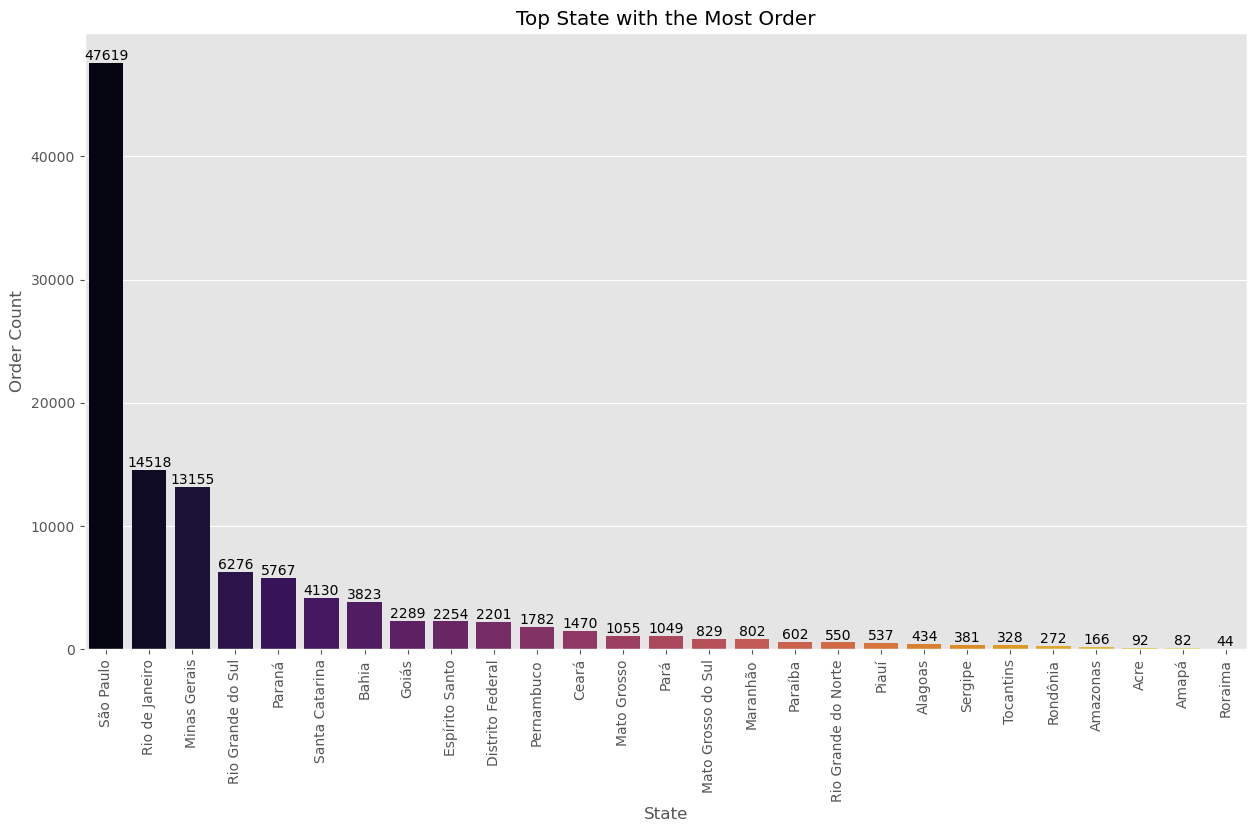
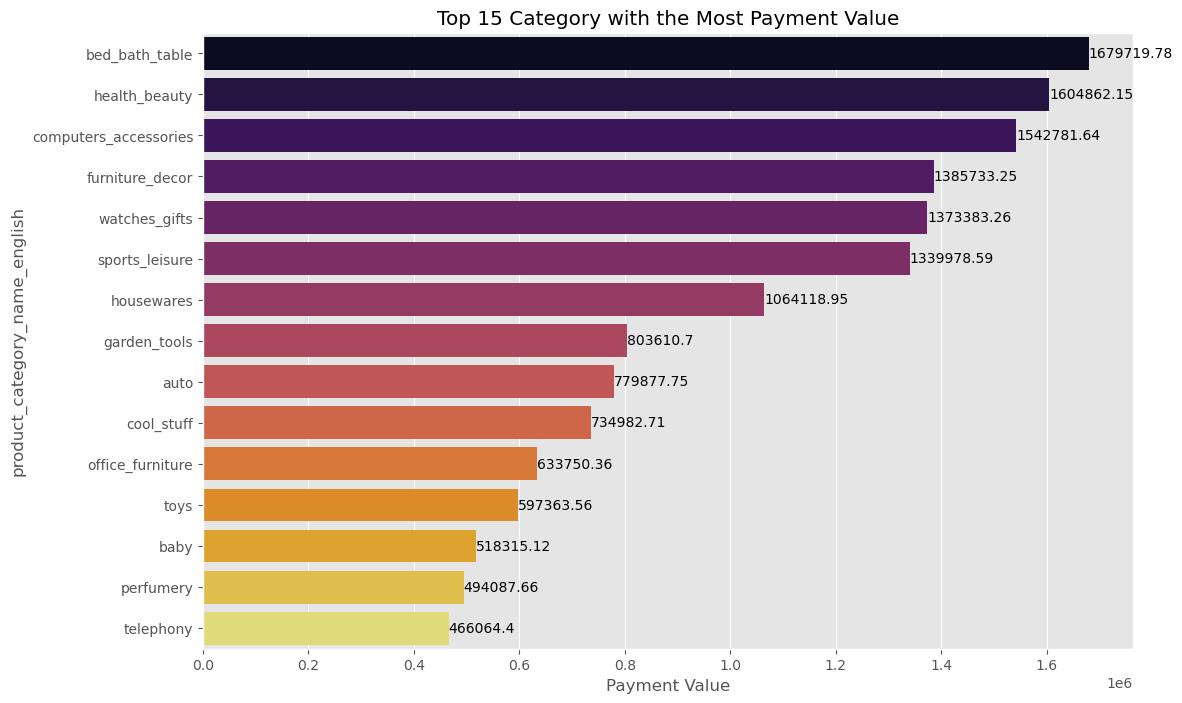

- **berdasarkan EDA yang sudah dilakukan sebelumnya kami akan melakukan re-categorize untuk feature - feature yang bersifat categorical**.
    - `Seller State dan Customer State`: hanya diambil 10 state teratas saja berdasarkan banyaknya order, yang lainnya dikategorikan sebagai others.
    - `Product Category`: hanya diambil 15 product terbaik berdasarkan revenue tertinggi, yang lain dikategorikan sebagai others.
- Hal ini juga dilakukan untuk mengantisipasi adanya **overfitting ketika akan dilakukan One Hot Encoding** (Dummy Variable).
- Kami juga menggunakan One Hot Encoding karena ingin model machine learning yang telah di build lebih mudah untuk di interpretasikan.

In [8]:
# print nunique seller state, customer_state, product_category_name_english, review_score (Categorcal Features)
print('jumlah unique seller state:', df_new['seller_state'].nunique())
print('jumlah unique customer state:', df_new['customer_state'].nunique())
print('jumlah unique product category:', df_new['product_category_name_english'].nunique())
print('jumlah unique review score:', df_new['review_score'].nunique())

jumlah unique seller state: 22
jumlah unique customer state: 27
jumlah unique product category: 69
jumlah unique review score: 5


In [9]:
# Top 15 Product Category by payment value
top15_product = df_new.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(15)

# product name to list
top15_product_name = top15_product.index.tolist()

In [10]:
top15_product_name

['bed_bath_table',
 'health_beauty',
 'computers_accessories',
 'furniture_decor',
 'watches_gifts',
 'sports_leisure',
 'housewares',
 'garden_tools',
 'auto',
 'cool_stuff',
 'office_furniture',
 'toys',
 'baby',
 'perfumery',
 'telephony']

In [11]:
# Top 10 Customer State by order count
top10_customer_state = df_new['customer_state'].value_counts().head(10)

# customer state to list
top10_customer_state_name = top10_customer_state.index.tolist()

In [12]:
top10_customer_state_name

['São Paulo',
 'Rio de Janeiro',
 'Minas Gerais',
 'Rio Grande do Sul',
 'Paraná',
 'Santa Catarina',
 'Bahia',
 'Goiás',
 'Espírito Santo',
 'Distrito Federal']

In [13]:
# Recategorize
df_new['product_category_name_english'] = df_new['product_category_name_english'].apply(lambda x: x if x in top15_product_name else 'others')
df_new['customer_state'] = df_new['customer_state'].apply(lambda x: x if x in top10_customer_state_name else 'others')
df_new['seller_state'] = df_new['seller_state'].apply(lambda x: x if x in top10_customer_state_name else 'others')

In [14]:
print('jumlah unique seller state yang baru:', df_new['seller_state'].nunique())
print('jumlah unique customer state yang baru:', df_new['customer_state'].nunique())
print('jumlah unique product category yang baru:', df_new['product_category_name_english'].nunique())

jumlah unique seller state yang baru: 11
jumlah unique customer state yang baru: 11
jumlah unique product category yang baru: 16


# Data Splitting

Selanjutnya kita akan membagi dataset tersebut dan membaginya menjadi 2 bagian yaitu training set dan test set. Hal ini dilakukan agar kita dapat membedakan data mana yang digunakan model untuk belajar dan data mana yang digunakan model untuk melakukan prediksi. Selain itu, pemisahan data akan sangat berguna karena bertujuan untuk menghindari information leakage.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_new.drop('payment_value', axis=1)
y = df_new['payment_value']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [18]:
X_train

,seller_state,customer_state,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name_lenght,product_description_lenght,product_photos_qty,order_quantity,price,freight_value,review_score,delivery_duration
41947,São Paulo,São Paulo,health_beauty,250.0,35.0,15.0,15.0,46.0,683.0,8.0,1,15.00,12.79,5,5
92905,São Paulo,São Paulo,toys,650.0,40.0,20.0,20.0,51.0,1015.0,1.0,1,349.99,10.80,5,2
85977,São Paulo,Rio de Janeiro,watches_gifts,250.0,16.0,2.0,11.0,54.0,335.0,4.0,1,54.00,15.48,5,5
89629,São Paulo,Rio de Janeiro,bed_bath_table,850.0,16.0,10.0,16.0,50.0,748.0,1.0,3,77.00,15.69,5,15
68943,São Paulo,São Paulo,auto,5575.0,63.0,9.0,63.0,54.0,582.0,1.0,1,93.10,17.36,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108233,Rio de Janeiro,São Paulo,others,7600.0,61.0,11.0,46.0,45.0,843.0,3.0,1,99.00,33.17,1,3
36008,São Paulo,Minas Gerais,watches_gifts,335.0,17.0,11.0,16.0,35.0,640.0,1.0,1,145.00,18.89,2,48
46265,São Paulo,Rio de Janeiro,others,1150.0,35.0,25.0,25.0,49.0,415.0,6.0,2,79.90,32.61,3,7
23587,São Paulo,São Paulo,health_beauty,2550.0,38.0,42.0,25.0,59.0,1631.0,4.0,1,100.00,12.61,5,4


In [19]:
X_test

,seller_state,customer_state,product_category_name_english,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name_lenght,product_description_lenght,product_photos_qty,order_quantity,price,freight_value,review_score,delivery_duration
100397,São Paulo,Paraná,toys,7400.0,45.0,29.0,53.0,35.0,537.0,2.0,1,179.80,19.14,5,6
104776,São Paulo,others,telephony,50.0,18.0,6.0,11.0,55.0,880.0,3.0,1,19.99,65.05,5,18
52462,São Paulo,São Paulo,others,800.0,23.0,7.0,16.0,60.0,688.0,3.0,1,45.00,13.71,4,11
42996,São Paulo,Rio Grande do Sul,others,14813.0,50.0,43.0,26.0,45.0,151.0,1.0,1,2350.00,105.12,1,33
81077,São Paulo,São Paulo,auto,150.0,16.0,10.0,16.0,58.0,238.0,1.0,1,15.00,7.11,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105430,São Paulo,São Paulo,watches_gifts,4338.0,17.0,12.0,14.0,35.0,514.0,2.0,1,170.00,16.82,5,12
105135,São Paulo,Distrito Federal,computers_accessories,478.0,20.0,14.0,18.0,26.0,327.0,1.0,2,35.00,16.11,4,7
98326,others,Espírito Santo,health_beauty,350.0,19.0,12.0,13.0,50.0,1257.0,1.0,1,61.99,22.93,1,45
97887,São Paulo,São Paulo,others,200.0,16.0,2.0,20.0,52.0,1436.0,1.0,1,29.90,11.85,5,4


In [20]:
y_train

41947      27.79
92905     360.79
85977      69.48
89629     304.47
68943     110.46
           ...  
108233    132.17
36008     163.89
46265     155.64
23587     112.61
29313     123.15
Name: payment_value, Length: 90005, dtype: float64

In [21]:
y_test

100397     198.94
104776     110.28
52462       58.71
42996     2455.12
81077      217.09
           ...   
105430     186.82
105135     102.22
98326       84.92
97887       41.75
81809      106.31
Name: payment_value, Length: 22502, dtype: float64

# Preprocessing

Pada dataset ini, kami akan membagi fitur menjadi beberapa kategori berdasarkan karakteristik datanya. Tujuan dilakukannya hal ini adalah untuk memudahkan ketika ingin melakukan feature engineering dan preprocessing.

- **Numeric features**: ('product_weight_g',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'product_name_lenght',
             'product_description_lenght',
             'product_photos_qty',
             'order_item_id',
             'price',
             'freight_value',
             'delivery_duration')
- **Categorical features**: ('seller_state',
             'customer_state',
             'product_category_name_english')
- **Ordinal features**: ('review_score')

`'review_score'` akan dibiarkan saja tanpa preprocessing (passthrough), karena sudah berbentuk numerikal dan memiliki urutannya sendiri atau `sudah bersifat ordinal (skala 1-5)`.

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [23]:
# Seperating features by its data types
numeric_features = ['product_weight_g',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'product_name_lenght',
             'product_description_lenght',
             'product_photos_qty',
             'order_quantity',
             'price',
             'freight_value',
             'delivery_duration']

categorical_features = ['seller_state',
             'customer_state',
             'product_category_name_english']                       

# Preprocessor for encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline for feature engineering
FE_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

FE_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'order_quantity', 'price',
                                                   'freight_value',
                                                   'delivery_duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['seller_state',
                                                   'customer_state',
                                                   'product_category_name_english'])]))])

In [24]:
X_train_prep = pd.DataFrame(FE_pipeline.fit_transform(X_train))
X_test_prep = pd.DataFrame(FE_pipeline.transform(X_test))

In [25]:
#rename columns after transformation
FE_pipeline.named_steps['preprocessor'].transformers_

[('num',
  RobustScaler(),
  ['product_weight_g',
   'product_length_cm',
   'product_height_cm',
   'product_width_cm',
   'product_name_lenght',
   'product_description_lenght',
   'product_photos_qty',
   'order_quantity',
   'price',
   'freight_value',
   'delivery_duration']),
 ('cat',
  OneHotEncoder(drop='first', handle_unknown='ignore'),
  ['seller_state', 'customer_state', 'product_category_name_english']),
 ('remainder', 'passthrough', [13])]

In [26]:
# Numeric features
FE_pipeline.named_steps['preprocessor'].transformers_[0][2]

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'order_quantity',
 'price',
 'freight_value',
 'delivery_duration']

In [27]:
# Categorical features
FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

array(['seller_state_Distrito Federal', 'seller_state_Espírito Santo',
       'seller_state_Goiás', 'seller_state_Minas Gerais',
       'seller_state_Paraná', 'seller_state_Rio Grande do Sul',
       'seller_state_Rio de Janeiro', 'seller_state_Santa Catarina',
       'seller_state_São Paulo', 'seller_state_others',
       'customer_state_Distrito Federal', 'customer_state_Espírito Santo',
       'customer_state_Goiás', 'customer_state_Minas Gerais',
       'customer_state_Paraná', 'customer_state_Rio Grande do Sul',
       'customer_state_Rio de Janeiro', 'customer_state_Santa Catarina',
       'customer_state_São Paulo', 'customer_state_others',
       'product_category_name_english_baby',
       'product_category_name_english_bed_bath_table',
       'product_category_name_english_computers_accessories',
       'product_category_name_english_cool_stuff',
       'product_category_name_english_furniture_decor',
       'product_category_name_english_garden_tools',
       'product_catego

In [28]:
# Remaining features
remaining_columns = df_new.drop(numeric_features + categorical_features + ['payment_value'], axis=1).columns.tolist()
remaining_columns

['review_score']

In [29]:
# Combine all features
new_columns = list(FE_pipeline.named_steps['preprocessor'].transformers_[0][2]) + \
              list(FE_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)) + \
              remaining_columns
              
X_train_prep.columns = new_columns
X_test_prep.columns = new_columns

In [30]:
display(X_train_prep.head())
display(X_test_prep.head())

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name_lenght,product_description_lenght,product_photos_qty,order_quantity,price,freight_value,...,product_category_name_english_health_beauty,product_category_name_english_housewares,product_category_name_english_office_furniture,product_category_name_english_others,product_category_name_english_perfumery,product_category_name_english_sports_leisure,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,review_score
0,-0.300000,0.50,0.166667,-0.333333,-0.400000,0.130298,3.5,0.0,-0.636557,-0.435265,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,-0.033333,0.75,0.583333,0.000000,-0.066667,0.651491,0.0,0.0,2.923379,-0.680641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
2,-0.300000,-0.45,-0.916667,-0.600000,0.133333,-0.416013,1.5,0.0,-0.222104,-0.103576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
3,0.100000,-0.45,-0.250000,-0.266667,-0.133333,0.232339,0.0,2.0,0.022317,-0.077682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,3.250000,1.90,-0.333333,2.866667,0.133333,-0.028257,0.0,0.0,0.193411,0.128237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_name_lenght,product_description_lenght,product_photos_qty,order_quantity,price,freight_value,...,product_category_name_english_health_beauty,product_category_name_english_housewares,product_category_name_english_office_furniture,product_category_name_english_others,product_category_name_english_perfumery,product_category_name_english_sports_leisure,product_category_name_english_telephony,product_category_name_english_toys,product_category_name_english_watches_gifts,review_score
0,4.466667,1.00,1.333333,2.200000,-1.133333,-0.098901,0.5,0.0,1.114772,0.347719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0
1,-0.433333,-0.35,-0.583333,-0.600000,0.200000,0.439560,1.0,0.0,-0.583528,6.008631,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
2,0.066667,-0.10,-0.500000,-0.266667,0.533333,0.138148,1.0,0.0,-0.317747,-0.321825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
3,9.408667,1.25,2.500000,0.400000,-0.466667,-0.704867,0.0,0.0,24.177471,10.949445,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.366667,-0.45,-0.250000,-0.266667,0.400000,-0.568289,0.0,0.0,-0.636557,-1.135635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90005 entries, 0 to 90004
Data columns (total 47 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   product_weight_g                                     90005 non-null  float64
 1   product_length_cm                                    90005 non-null  float64
 2   product_height_cm                                    90005 non-null  float64
 3   product_width_cm                                     90005 non-null  float64
 4   product_name_lenght                                  90005 non-null  float64
 5   product_description_lenght                           90005 non-null  float64
 6   product_photos_qty                                   90005 non-null  float64
 7   order_quantity                                       90005 non-null  float64
 8   price                                                90005 non-nul

- **RobustScaler**: adalah teknik scaling fitur berdasarkan statistik yang tidak terlalu sensitif terhadap outlier (rentang median dan interkuartil) dan biasanya digunakan untuk fitur numerik. Penskalaan ini membantu model agar tidak terpengaruh oleh nilai-nilai ekstrem yang mungkin membiaskan/salah menafsirkan model.
    - Kami menggunakan `robust scaler`, karena dataset ini memiliki banyak outliers dan kami memutuskan untuk tidak menghapusnya (**Part 1 Data Cleaning**), maka sebaiknya menggunakan robust scaler dikarenakan robust scaler tidak terlalu sensitif terhadap outliers.
- **OneHotEncoder**: digunakan untuk mengubah variabel kategori menjadi rangkaian variabel biner (angka 1 atau 0) atau bisa juga disebut variabel dummy. Tujuannya adalah untuk pemrosesan informasi kategorikal tanpa mengasumsikan urutan antar kategori (nominal).
    - Kami menggunakan `One Hot Encoder`, karena data categorical yang ada pada dataset (seller state, customer state, product name) `bersifat nominal` atau bisa dikatakan tidak memiliki urutan yang pasti, sehingga One Hot Encoder akan lebih tepat untuk digunakan dibandingkan Ordinal Encoder.

# Model Benchmarking

- Setelah selesai melakukan preprocessing selanjutnya adalah mencari model terbaik menggunakan cross validation. Beberapa algoritma yang akan di uji coba pada model ini adalah:
    - Linear regression
    - Lasso Regression
    - Ridge Regression
    - Decision Tree Regressor
    - KNN Regressor
    - Random Forest
    - XG Boost
- Model yang terbaik akan dilanjutkan pada proses Hyperparameter Tuning

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, median_absolute_error

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Using training set to do cross validation (X_train_prep and y_train are the training data)

# Define the models
models = [
    ('Linear', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('KNN', KNeighborsRegressor()),
    ('Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor())
]

# Perform cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train_prep, y_train, cv=5, scoring='r2')  # using R2 to calculate the average model score
    print(f'{name}: Average R^2 score: {scores.mean()}')

Linear: Average R^2 score: 0.6393987194865944
Lasso: Average R^2 score: 0.6376048899619999
Ridge: Average R^2 score: 0.6394009315133312
KNN: Average R^2 score: 0.8078068735998227
Tree: Average R^2 score: 0.6073078796884475
Random Forest: Average R^2 score: 0.842863836388865
XGBoost: Average R^2 score: 0.8265857664271972


- Berdasarkan hasil Cross Validation, 2 algoritma terbaik yang dapat digunakan pada model ini adalah `Random Forest Regressor` dan `XG Boost` karena memiliki score cukup tinggi.
- Sebelum melanjutkan ke tahap Hyperparameter Tuning, kita akan menganalisa terlebih dahulu residual dari Base Model ini untuk mengetahui evaluation metrics apa yang cocok untuk digunakan.

# Base Model

## Random Forest

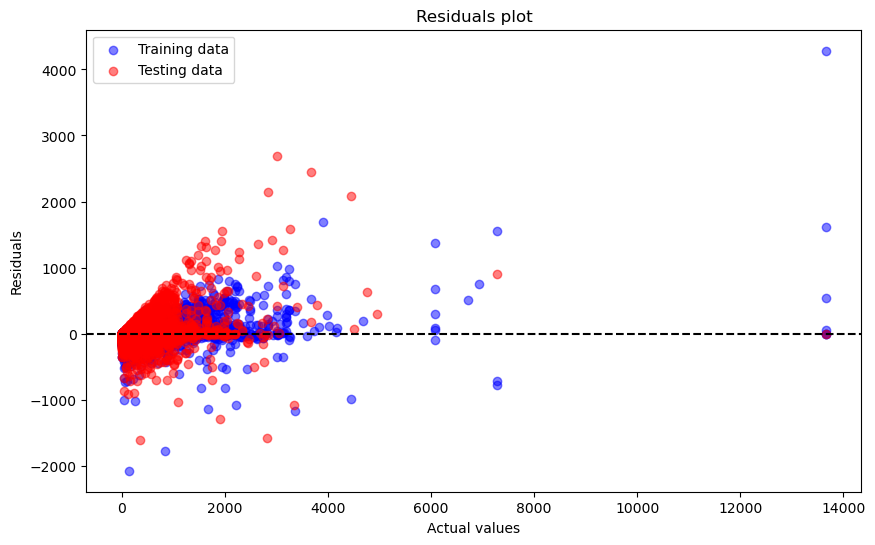

In [34]:
# Random Forest base model
rf_model = RandomForestRegressor(random_state=99)
rf_model.fit(X_train_prep, y_train)

# Make predictions
train_preds_rf = rf_model.predict(X_train_prep)
test_preds_rf = rf_model.predict(X_test_prep)

# Calculate residuals
train_residuals_rf = y_train - train_preds_rf
test_residuals_rf = y_test - test_preds_rf

# Plot Residuals
plt.figure(figsize=(10,6))

plt.scatter(y_train, train_residuals_rf, color='blue', label='Training data', alpha=0.5)
plt.scatter(y_test, test_residuals_rf, color='red', label='Testing data', alpha=0.5)

plt.title('Residuals plot')
plt.xlabel('Actual values')
plt.ylabel('Residuals')

plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

plt.show()

In [35]:
# Calculate residuals
train_residuals_rf = y_train - train_preds_rf
test_residuals_rf = y_test - test_preds_rf

# Calculate IQR
Q1_rf = np.percentile(train_residuals_rf, 25)
Q3_rf = np.percentile(train_residuals_rf, 75)
IQR_rf = Q3_rf - Q1_rf

# Identify outliers
outliers_mask_rf = (train_residuals_rf < (Q1_rf - 1.5 * IQR_rf)) | (train_residuals_rf > (Q3_rf + 1.5 * IQR_rf))
outliers_rf = train_residuals_rf[outliers_mask_rf]

# Calculate percentage of outliers
outliers_percentage_rf = outliers_rf.shape[0] / train_residuals_rf.shape[0] * 100

print(f'Random Forest Percentage of outliers: {outliers_percentage_rf:.2f}%')

Random Forest Percentage of outliers: 22.83%


- Ternyata `persebaran residual` dari model ini cukup bervariasi dan juga `memiliki outlier sebanyak 22.83%`.
- Maka dari itu eveluation `metrics yang akan cocok untuk digunakan adalah Median Absolute Error (MedAE)` dikarenakan **tidak terlalu sensitif dan lebih Robust terhadap outlier serta biasa digunakan pada residual yang memiliki banyak outlier atau residu yang tidak normal**.
- Selain itu **Unit MedAE sama dengan unit variabel target yang diprediksi**, sehingga `memudahkan untuk menginterpretasikan apakah ukuran kesalahannya signifikan atau tidak`.

In [36]:
# Calculate Median Absolute Error for training data
train_medae_rf = median_absolute_error(y_train, train_preds_rf)

# Calculate Median Absolute Error for test data
test_medae_rf = median_absolute_error(y_test, test_preds_rf)

# Calculate R2 for training data
train_r2_rf = r2_score(y_train, train_preds_rf)

# Calculate R2 for test data
test_r2_rf = r2_score(y_test, test_preds_rf)

#Create DataFrame for model evaluation
model_eval_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train MedAE': [train_medae_rf],
    'Test MedAE': [test_medae_rf],
    'Train R2': [train_r2_rf],
    'Test R2': [test_r2_rf]
})

model_eval_rf

,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,Random Forest,3.4052,9.054547,0.974625,0.877454


- Namun yang menjadi perhatian disini adalah hasil dari base model yang sudah di training sangat `overfitting` karena memang pada dasarnya **algoritma yang berbasis pohon akan memiliki kecenderungan untuk overfit**, sehingga sangat dibutuhkan penyesuaian pada parameternya (parameter tuning).

## XG Boost

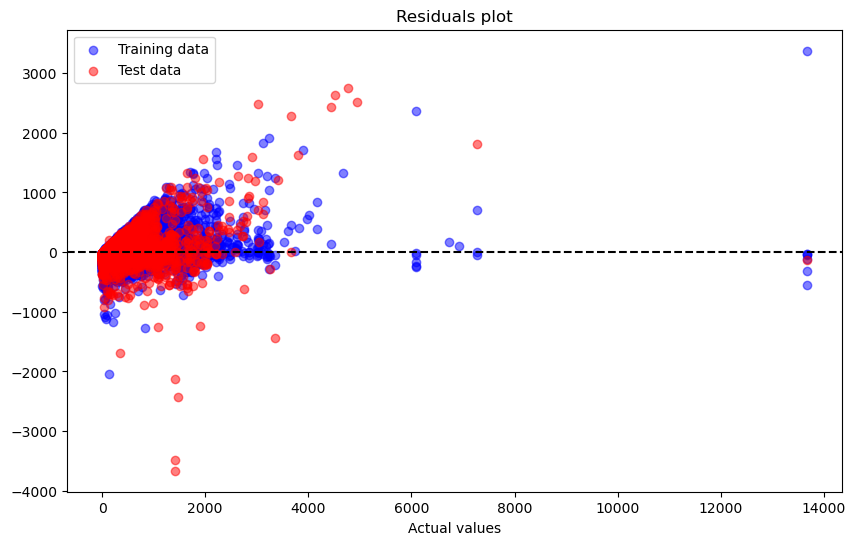

In [37]:
# XGBoost base model
xgb_model = XGBRegressor(random_state=99)
xgb_model.fit(X_train_prep, y_train)

# Make predictions
train_preds_xgb = xgb_model.predict(X_train_prep)
test_preds_xgb = xgb_model.predict(X_test_prep)

# Calculate residuals
train_residuals_xgb = y_train - train_preds_xgb
test_residuals_xgb = y_test - test_preds_xgb

# Plot Residual
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_residuals_xgb, c='blue', marker='o', label='Training data', alpha=0.5)
plt.scatter(y_test, test_residuals_xgb, c='red', marker='o', label='Test data', alpha=0.5)

plt.title('Residuals plot')
plt.xlabel('Actual values')

plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

plt.show()

In [38]:
# Calculate residuals
train_residuals_xgb = y_train - train_preds_xgb
test_residuals_xgb = y_test - test_preds_xgb

# Calculate IQR
Q1_xgb = np.percentile(train_residuals_xgb, 25)
Q3_xgb = np.percentile(train_residuals_xgb, 75)
IQR_xgb = Q3_xgb - Q1_xgb

# Identify outliers
outlier_mask_xgb = (train_residuals_xgb < (Q1_xgb - 1.5 * IQR_xgb)) | (train_residuals_xgb > (Q3_xgb + 1.5 * IQR_xgb))
outliers_xgb = train_residuals_xgb[outlier_mask_xgb]

# Calculate percentage of outliers
outlier_percentage_xgb = len(outliers_xgb) / len(train_residuals_xgb) * 100

print(f'XGB Percentage of outliers: {outlier_percentage_xgb:.2f}%')


XGB Percentage of outliers: 20.65%


- Persebaran `Residual dari model XG Boost juga sangat bervariasi` dan juga memiliki outlier percentage yang hampir sama dengan model Random Forest yaitu sebesar `20.65%`

In [39]:
# Calculate Median Absolute Error for training data
train_medae_xgb = median_absolute_error(y_train, train_preds_xgb)

# Calculate Median Absolute Error for test data
test_medae_xgb = median_absolute_error(y_test, test_preds_xgb)

# Calculate R2 for training data
train_r2_xgb = r2_score(y_train, train_preds_xgb)

# Calculate R2 for test data
test_r2_xgb = r2_score(y_test, test_preds_xgb)

#Create DataFrame for model evaluation
model_eval_xgb = pd.DataFrame({
    'Model': ['XGBoost'],
    'Train MedAE': [train_medae_xgb],
    'Test MedAE': [test_medae_xgb],
    'Train R2': [train_r2_xgb],
    'Test R2': [test_r2_xgb]
})

model_eval_xgb

,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,XGBoost,9.656234,9.870219,0.924669,0.836308


- Namun dari segi R-Squared model XG Boost tidak sebaik Random Forest (sedikit lebih kecil dari Random Forest).
- MedAE juga demikian, sedikit lebih besar daripada model Random Forest.
- Maka kita akan coba `melakukan Hyperparameter tuning juga pada model ini untuk menentukan yang terbaik diantara keduanya`.

# Hyperparameter Tuning

## Random Forest

In [40]:
# Hyperparameter tuning Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [100, 150]
# Maximum number of levels in tree
max_depth = [20, 30]
# Min samples to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 7]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor(random_state=99)

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator=rf,
                               param_grid=random_grid,
                               cv=5,
                               scoring='neg_median_absolute_error',
                               n_jobs=-1)

In [41]:
rf_random.fit(X_train_prep, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=99), n_jobs=-1,
             param_grid={'max_depth': [20, 30], 'min_samples_leaf': [6, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]},
             scoring='neg_median_absolute_error')

In [42]:
results_rf_random = pd.DataFrame(rf_random.cv_results_)
results_rf_random.sort_values(by='rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,145.980204,6.895347,0.537951,0.063417,20,6,2,150,"{'max_depth': 20, 'min_samples_leaf': 6, 'min_...",-8.319411,-8.221138,-8.463138,-8.38734,-8.517437,-8.381693,0.104641,1
3,144.457232,3.830396,0.484465,0.008013,20,6,3,150,"{'max_depth': 20, 'min_samples_leaf': 6, 'min_...",-8.319411,-8.221138,-8.463138,-8.38734,-8.517437,-8.381693,0.104641,1


In [43]:
rf_random.best_params_

{'max_depth': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 150}

In [44]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=6, n_estimators=150,
                      random_state=99)

In [45]:
# Evaluate the Random Forest model with the best hyperparameters
# Make predictions
train_preds_rf_tuned = rf_random.best_estimator_.predict(X_train_prep)
test_preds_rf_tuned = rf_random.best_estimator_.predict(X_test_prep)

# Calculate Median Absolute Error for training data
train_medae_rf_tuned = median_absolute_error(y_train, train_preds_rf_tuned)

# Calculate Median Absolute Error for test data
test_medae_rf_tuned = median_absolute_error(y_test, test_preds_rf_tuned)

# Calculate R2 for training data
train_r2_rf_tuned = r2_score(y_train, train_preds_rf_tuned)

# Calculate R2 for test data
test_r2_rf_tuned = r2_score(y_test, test_preds_rf_tuned)

#Create DataFrame for model evaluation
model_eval_rf_tuned = pd.DataFrame({
    'Model': ['Random Forest Tuned'],
    'Train MedAE': [train_medae_rf_tuned],
    'Test MedAE': [test_medae_rf_tuned],
    'Train R2': [train_r2_rf_tuned],
    'Test R2': [test_r2_rf_tuned]
})

model_eval_rf_tuned

,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,Random Forest Tuned,6.760033,8.400692,0.880411,0.861012


- Setelah dilakukan Hyperparameter Tuning, Model menjadi lebih stabli dan lebih tergeneralisasi. Hal ini dapat dilihat dari R-Squared dari Test Set maupun Train Set sama sama memiliki hasil yang tinggi dan berjarak tidak terlalu jauh, cukup berbeda jika dibandingkan dengan base model.
- Selain itu MedAE yang didapatkan juga lebih baik dari Base Model & jarak antara MedAE Train Set dan Test Set tidak trerlalu jauh (stabil).
- Sehingga dapat dikatakan bahwa Tuning ini berhasil membuat model menjadi lebih baik.

## XG Boost

In [46]:
# Hyperparameter tuning XGBoost using GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150],         # determines the number of boosting rounds or trees to build.
    'max_depth': [2, 3, 5],             # controls the maximum depth of the trees in the model
    'learning_rate': [0.01, 0.1, 0.2],  # controls the contribution of each tree to the final prediction
    'subsample': [0.5, 0.7, 1],         # controls the fraction of the samples used to fit each tree
    'colsample_bytree': [0.5, 0.7, 1],  # controls the fraction of features used to fit each tree
}

# Initialize XGBRegressor
xgb = XGBRegressor(random_state=99)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_median_absolute_error', n_jobs=-1)

In [47]:
# Fit the model
grid_search_xgb.fit(X_train_prep, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=99, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 5], 'n_estimators': [100, 150],
                         'subsample': [0.5, 0.7, 1]},
             scoring='neg_median_absolute_error')

In [48]:
# Get the best parameters
grid_search_xgb.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [49]:
# Get the best estimator
grid_search_xgb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=99, ...)

In [50]:
# Make predictions
train_preds_xgb_tuned = grid_search_xgb.best_estimator_.predict(X_train_prep)
test_preds_xgb_tuned = grid_search_xgb.best_estimator_.predict(X_test_prep)

# Calculate Median Absolute Error for training data
train_medae_xgb_tuned = median_absolute_error(y_train, train_preds_xgb_tuned)

# Calculate Median Absolute Error for test data
test_medae_xgb_tuned = median_absolute_error(y_test, test_preds_xgb_tuned)

# Calculate R2 for training data
train_r2_xgb_tuned = r2_score(y_train, train_preds_xgb_tuned)

# Calculate R2 for test data
test_r2_xgb_tuned = r2_score(y_test, test_preds_xgb_tuned)

#Create DataFrame for model evaluation
model_eval_xgb_tuned = pd.DataFrame({
    'Model': ['XGBoost Tuned'],
    'Train MedAE': [train_medae_xgb_tuned],
    'Test MedAE': [test_medae_xgb_tuned],
    'Train R2': [train_r2_xgb_tuned],
    'Test R2': [test_r2_xgb_tuned]
})

model_eval_xgb_tuned

,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,XGBoost Tuned,8.950543,8.959386,0.884376,0.843857


- Tuning XG Boost juga berjalan dengan baik, karena masalah overfit yang cukup ekstrem juga sudah teratasi.

## Comparisson XGB vs RF

In [51]:
# Combine evaluation results before tuning
model_eval_before = pd.concat([model_eval_rf, model_eval_xgb], axis=0)

# Combine evaluation results after tuning
model_eval_after = pd.concat([model_eval_rf_tuned, model_eval_xgb_tuned], axis=0)

In [52]:
print('Evaluation results before tuning:')
display(model_eval_before)
print('Evaluation results after tuning:')
display(model_eval_after)

Evaluation results before tuning:


,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,Random Forest,3.405200,9.054547,0.974625,0.877454
0,XGBoost,9.656234,9.870219,0.924669,0.836308


Evaluation results after tuning:


,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,Random Forest Tuned,6.760033,8.400692,0.880411,0.861012
0,XGBoost Tuned,8.950543,8.959386,0.884376,0.843857


- Setelah melakukan proses hyperparameter tuning kedua model menjadi lebih tergeneralisasi jika dibandingkan dengan base model yang cenderung overfitting (jauh lebih bagus hasilnya di training set).
- Tetapi memang pada akhirnya `model Random Forest tetap lebih baik daripada XG Boost`, maka dari itu kita akan menggunakan model ini sebagai **Final Model**.

# Interpreting Final Model

## How the Model Works

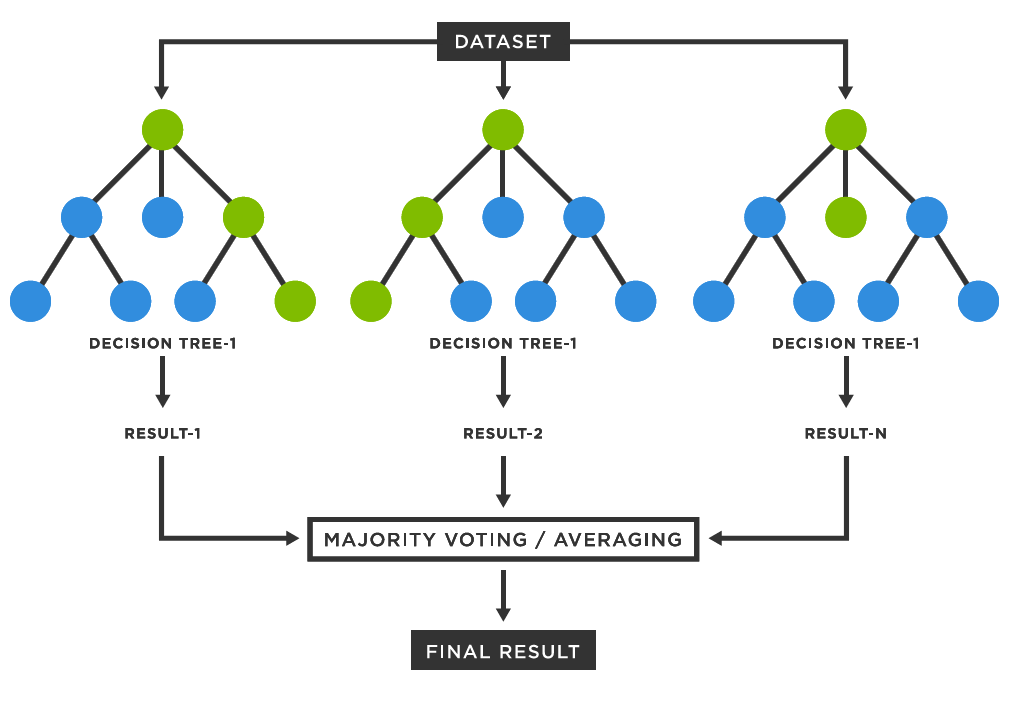

### Ensemble Method
- Ensemble method adalah teknik yang menggabungkan prediksi dari beberapa algoritma Machine Learning untuk menghasilkan prediksi yang lebih akurat dibandingkan model individual mana pun. Sederhananya, model ensambel adalah model yang terdiri dari banyak model. Ada banyak teknik ensambel seperti Stacking, Bagging, Boosting, dll.

### Bagging (Bootstrap Aggregating)
- Bootstrapping adalah teknik sampling dimana kita membuat subset observasi dari dataset original, teknik ini disebut juga dengan Bagging. Dalam teknik ini hasil yang tergeneralisasi diperoleh dengan menggabungkan hasil berbagai model prediksi. Ini menciptakan subset pelatihan yang berbeda dari sampel data pelatihan & hasil akhir didasarkan pada Majotity Vote. Misalnya, **`Random Forest`**. Berikut adalah langkah-langkah yang terlibat dalam Bagging:

1. **Pemilihan Subset**: Bagging dimulai dengan memilih sampel acak, atau subset, dari keseluruhan dataset.
2. **Bootstrap Sampling**: Setiap model kemudian dibuat dari sampel ini, yang disebut Sampel Bootstrap, yang diambil dari dataset utama.
3. **Pelatihan Model Secara Independen**: Setiap model dilatih secara independen pada Sampel Bootstrap-nya. Proses pelatihan ini menghasilkan hasil untuk setiap model.
4. **Majority Vote**: Hasil akhir ditentukan dengan menggabungkan hasil semua model melalui pemungutan suara mayoritas. Hasil yang paling sering diprediksi di antara model-model tersebut dipilih.
5. **Agregasi**: Langkah ini, yang melibatkan penggabungan semua hasil dan menghasilkan keluaran akhir berdasarkan suara mayoritas, dikenal sebagai agregasi.

### Langkah-Langkah dalam Algoritma Random Forest
- **Langkah 1**: Dalam model Random Forest, subset data point dan subset fitur dipilih secara acak dari dataset utama untuk membangun setiap Decision Tree.
- **Langkah 2**: Decision Tree individual dibuat untuk setiap sampel.
- **Langkah 3**: Setiap Decision Tree akan di train secara bersamaan dan menghasilkan Output-nya masing - masing.
- **Langkah 4**: Hasil akhir dihitung berdasarkan Majority Vote untuk Klasifikasi dan atau Regresi.
- **Langkah 5**: Agregasi semua hasil berdasarkan Majority Vote untuk menghasilkan Final Output.

Secara sederhana **`Random Forest merupakan kumpulan hasil prediksi dari beberapa Decision Tree`**. Jadi bisa dikatakan hasil prediksi dari Random Forest akan **lebih kuat dan akurat** jika dibandingkan dengan hasil prediksi dari Decision Tree tunggal.

## Feature Importances

In [53]:
# Feature Importance
feature_importance = rf_random.best_estimator_.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_prep.columns,
    'Importance': feature_importance
})

# Sort the DataFrame
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

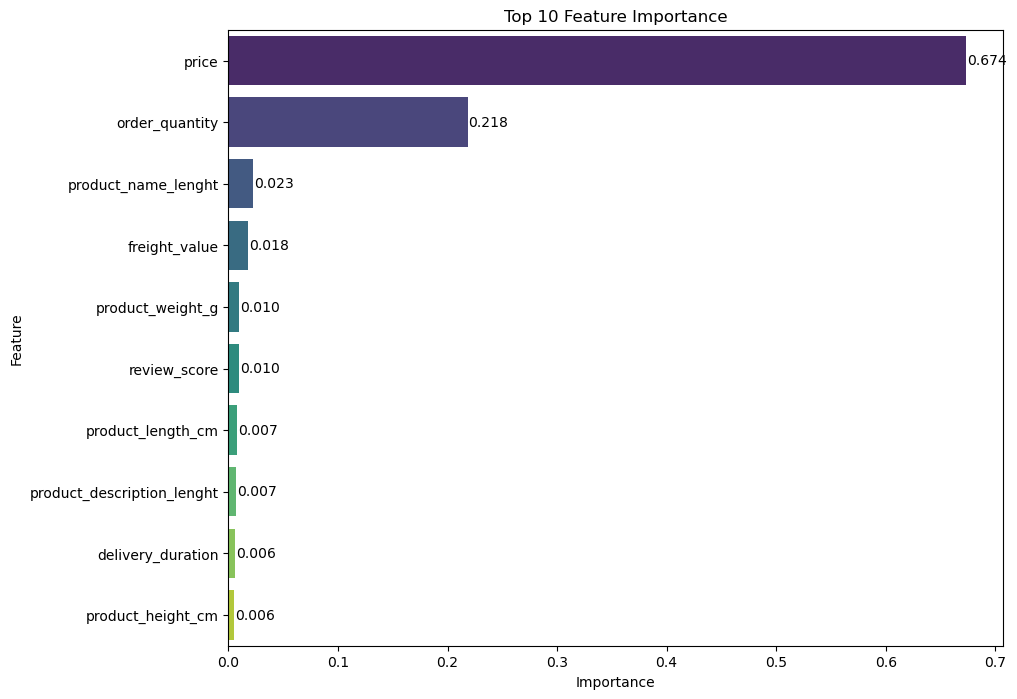

In [54]:
# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')

plt.title('Top 10 Feature Importance')

#Annotate the feature importance
for i, v in enumerate(feature_importance_df['Importance'].head(10)):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.show()

- Berikut adalah 10 fitur yang paling berpengaruh dalam memprediksi model ini.
- `Harga sebuah barang` dan juga `kuantitas penjualan` sebuah barang menjadi faktor utama dalam model ini.
- Selain harga juga Penamaan judul dan deskripsi produk, biaya dan lama pengiriman, serta review score juga berperan penting dalam model ini.
- Feature Importances tidak berarti kausalitas, namun hanya memberi tahu kita fitur mana yang paling berpengaruh dalam prediksi model. Selain itu, pentingnya suatu fitur bergantung pada model tertentu dan dapat berubah jika menggunakan model lain atau mengubah parameter model.

## Evaluation Metrics

In [55]:
model_eval_rf_tuned

,Model,Train MedAE,Test MedAE,Train R2,Test R2
0,Random Forest Tuned,6.760033,8.400692,0.880411,0.861012


- Untuk `R-Squared` pada Test Set sebesar 86% yang berarti sekitar **`86%`** variabilitas revenue dari merchant Olist dapat dijelaskan oleh fitur-fitur dalam model. Ini adalah nilai R-Squared yang relatif tinggi, menunjukkan bahwa model tersebut menjelaskan sebagian besar variasi revenue merchant & model tersebut cukup fit dengan data.
- `MedAe` sebesar 8.400692 pada test set berarti tingkat kesalahan prediksi revenue yang median-nya sebesar 8.400692 unit dari nilai sebenarnya. Dengan kata lain, ini menunjukkan bahwa kesalahan prediksi pendapatan merchant berada disekitar 8.400692 Real brazil.

## Prediction vs Actual

In [56]:
# dataframe actual value and prediction value

df_result = pd.DataFrame({'actual_value': y_test, 'prediction_value': test_preds_rf_tuned})

df_result

,actual_value,prediction_value
100397,198.94,204.107604
104776,110.28,79.909569
52462,58.71,65.043894
42996,2455.12,2527.142371
81077,217.09,105.856111
...,...,...
105430,186.82,193.285744
105135,102.22,126.048748
98326,84.92,85.408137
97887,41.75,45.326757


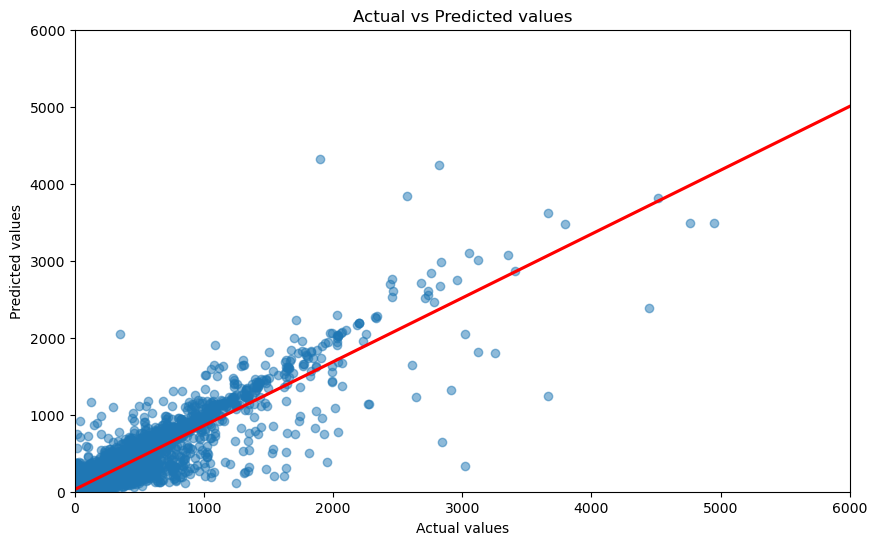

In [57]:
# y_test and test_preds

# Plot the actual vs predicted values and regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_result, x='actual_value', y='prediction_value', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5}, ci=None)

plt.xlim(0, 6000)
plt.ylim(0, 6000)

plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

- Berdasarkan Data Frame dan scatter plot, perbedaan antara hasil prediksi dengan nilai aktual tidak terlalu jauh, karena hasil dari MedAE-nya juga tidak terlalu tinggi.
- Hal ini dapat dilihat pada scatter plot yang rata - rata data pointnya tersebar tidak terlalu jauh di antara garis regresi.
- **Persebaran Revenue Merchant** di dataset ini mayoritas berada di `0 - 2000 Real Brazil` sehingga scatter plotnya cenderung menumpuk di sebelah kiri.

# Final Model Pipeline

In [58]:
#combine preprocessing and best model into one pipeline

# Preprocessing
numeric_features = ['product_weight_g',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'product_name_lenght',
             'product_description_lenght',
             'product_photos_qty',
             'order_quantity',
             'price',
             'freight_value',
             'delivery_duration']

categorical_features = ['seller_state',
             'customer_state',
             'product_category_name_english']                       

# Preprocessor for encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical_features)
    ],
    remainder='passthrough'
)

# Best model
best_model = RandomForestRegressor(max_depth=20, min_samples_leaf=6, min_samples_split=2, n_estimators=150, random_state=99)

# Combine preprocessor and best model into one pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

In [59]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'order_quantity', 'price',
                                                   'freight_value',
                                                   'delivery_duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['seller_state',
                                                   'customer_state',
                                                   'product_category_name_english'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=6,
                                       n_estimators=150, random_state=99))])

In [60]:
test_preds_final = final_pipeline.predict(X_test)

# Calculate Median Absolute Error for test data
test_medae_final = median_absolute_error(y_test, test_preds_final)

# Calculate R2 for test data
test_r2_final = r2_score(y_test, test_preds_final)

#Create DataFrame for model evaluation
model_eval_final = pd.DataFrame({
    'Model': ['Final Model (Random Forest)'],
    'Test MedAE': [test_medae_final],
    'Test R2': [test_r2_final]
})

model_eval_final

,Model,Test MedAE,Test R2
0,Final Model (Random Forest),8.400692,0.861012


# Summary

- **Model Overview**
    - Setelah dilakukan **Cross Validation** dan juga **Hyperparameter Tuning**, algortima yang paling fit untuk melakukan prediksi Revenue Merchant Olist adalah `Random Forest`. Hal ini dapat dilihat dari diperolehnya nilai R-Squared yang relatif tinggi yaitu sebesar `86.1%` yang berarti sekitar `86%` variabilitas revenue dari merchant Olist dapat dijelaskan oleh fitur-fitur yang ada didalam model ini.
    - Nilai Median Absolute Error yang juga relatif rendah (**8.4**) menandakan bahwa model ini dapat dengan baik memprediksi revenue dari para Merchant Olist. Nilai sebesar `8.4` berarti kesalahan melesetnya prediksi kurang lebih hanya sejauh 8.4 Real Brazil, yang mana persebaran Revenue Merchant di dataset ini mayoritas berada di angka 2000 Real Brazil.
- **Recommendation**
    - `Harga sebuah barang` dan juga `kuantitas penjualan barang` menjadi faktor utama dalam menentukan `revenue`. Sehingga menentukan harga dan stok barang yang optimal (tidak terlalu tinggi dan tidak terlalu rendah) memang sangat berpengaruh terhadap revenue dari Merchant. Selain itu Penentuan `Stok yang optimal` juga dapat meminimalisir terjadinya `Inventroy Shortage & Overage`.
    - `Penamaan Judul` dan `Deskripsi dari Produk` pada halaman E-Commerce Anda. Ketika calon pembeli akan memilih sebuah produk untuk dibeli hal yang akan pertama kali mereka lihat adalah judul dari barang yang sedang dijual lalu setelah masuk ke store page maka hal yang dilihat selanjutnya adalah deskripsi produk (apakah deskripsi cukup lengkap dan informatif). Maka dari itu membuat nama yang menarik serta deskripsi yang detail akan sangat berpengaruh terhadap Revenue Anda.
    - `Biaya Pengiriman` dan `Lama Pengiriman` juga faktor yang menjadi penentu dari banyaknya revenue yang Anda dapatkan. Pilihlah partner Ekspedisi yang memang memiliki layanan yang relatif cukup cepat serta adakan promo - promo biaya pengiriman seperti yang sudah dijelaskan pada Notebook EDA (Part 2).
    - `Review Score`, mempertahankan review yang baik pada toko Anda juga sangat penting, agar para pelanggan juga akan lebih percaya dan nyaman ketika ingin berbelanja di toko anda, berilah pelayanan dan produk yang terbaik agar Review Score terus berada di angka yang tinggi. Faktor-faktor yang dapat mempengaruhi pelanggan untuk memberikan ulasan yang baik:
        - fast transactions.
        - convenient payment methods.
        - price and value.
        - customer service.
        - product quality.
        - information quality.
        - delivery quality.
        
    Source: 
    - https://www.sciencedirect.com/science/article/pii/S1877050910004229
    - https://ejournals.ph/article.php?id=16559#:~:text=Five%20factors%20contributed%20to%20this,distributing%20questionnaires%20to%20393%20respondents.
- **Notes for Further Analysis**
    - **Ekspansi Data**: Untuk meningkatkan akurasi prediksi, menambahkan data dengan fitur tambahan dapat lebih membantu meningkatkan akurasi analsis, seperti sub kategori barang, jenis ekspedisi yang digunakan, indikator penggunaan voucher transaksi, dan lain sebagainya.
    - **Penyempurnaan Model Berkelanjutan**: Dikarenakan keterbatasan waktu, maka selanjutnya dapat menyempurnakan model melalui penyetelan hyperparameter yang berkelanjutan, bereksperimen dengan algoritma alternatif, dan mengeksplorasi teknik ensambel untuk lebih meningkatkan performa prediktif.

# Before & After Machine Learning Implementation

- **Before ML Implementation**
    - Merchant kesulitan dalam menentukan harga dan kuantitas penjual yang tepat.
    - Merchant ingin menjual produk aksesoris komputer sebanyak 100 Unit dengan Modal sebesar 500 Real Brazil dan harga jual barang satuannya 10 Real dengan harapan mendapat keuntungan penuh sebesar 1000 Real (10 Real * 100 Unit).
    - Kenyataanya adalah semua barang tidak laku terjual dikarenakan adanya persaingan pasar antar Merchant di E-commerce & lain sebagainya, yang menyebabkan stok menjadi tersisa banyak di gudang (Overage Invetory) serta keuntungan yang didapatkan tidak maksimal bahkan cenderung mengalami kerugian.
- **After ML Implementation**
    - Para Merchant dapat terlebih dahulu mengevaluasi berdasarkan data penjualan mereka di masa lampau.
    - Setelah itu Merchant dapat melakukan simulasi menggunakan Machine Learning berapa banyak revenue yang bisa mereka dapatkan.
    - Sebagai contoh yang sebelumnya memiliki stok aksesoris komputer sebanyak 100 unit dengan modal 500 Real namun ternyata tidak semuanya laku terjual, maka dapat dikombinaskan dengan menjual beberapa variasi produk.
    - Misal dengan modal sebanyak 500 Real akan di bagi - bagi menjadi:
        - 200 Real untuk Aksesoris komputer.
        - 100 Real untuk Housewares.
        - 100 Real untuk Cool Stuff.
        - 100 Real untuk Aksesoris Otomotif.
    - Setelah menentukan barang - barang yang ingin dijual dan fitur - fitur lainnya lalu di input ke dalam Machine Learning, maka selanjutnya akan didapatkan estimasi dari Revenue yang possible untuk diperoleh.
    - Sehingga para merchant lebih dipermudah untuk melakukan simulasi penjualan barang dan pengoptimalan revenue yang mereka dapatkan, serta dapat meminimalisir terjadinya Shortage & Overage Inventory.

Notes:

**Revenue yang diperoleh dari hasil Machine Learning adalah Revenue yang didapatkan oleh Merchant dalam kurun waktu 1 tahun (revenue per tahun).**